### This is a fun project I worked on after completing the first course of the deeplearning specialization on coursera by deeplearning.ai. This is not an accurate model, I did a quick rough implementation of the binary classification model that I created for an assignment in the course. 

In [1]:
import time
import numpy as np
import h5py
import matplotlib.pyplot as plt
import scipy
from PIL import Image
from scipy import ndimage
from dnn_app_utils_v3 import *
import os
import cv2
from sklearn.model_selection import train_test_split

%matplotlib inline
plt.rcParams['figure.figsize'] = (5.0, 4.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

%load_ext autoreload
%autoreload 2

np.random.seed(1)

Get the list of image files located in the folder 'faces'

In [2]:
images = os.listdir("./faces")

if 'desktop.ini' in images:
    images.remove('desktop.ini')

# This is a function to only use the files with classes : anger, fear, disgust, happy, sad, surprised, and neutral. The pictures are from VISGRAF faces Database and Japanese Female Facial Expression (JAFFE) Database. 

In [3]:
def contains_keyword(file):
    keywords = ['AN', 'DI', 'FE', 'HA', 'SA', 'SU', 'NE', '-00','-01','-02','-03','-04','-05','-06'] 
    b_list = [i in files for i in keywords]
    if True in b_list:
        return True
    else:
        return False

## Getting labels and pre-processing images

In [4]:
labels = []
emotions = []
X = []

# anger = 1; disgust = 2; fear = 3; happy = 4; sad = 5; surprised = 6; neutral = 0

for files in images:
    if contains_keyword(files):
        fname = "faces/" + files
        img = cv2.imread(fname)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        #my_image = cv2.resize(img, (num_px, num_px)) 
        my_image = img/255.
        X.append(my_image)
        
    label_each = np.zeros(7)
    if 'AN' in files:
        emotions.append('Angry')
        label_each[0] = 1
        labels.append(label_each)
    elif 'DI' in files:
        emotions.append('Disgust')
        label_each[1] = 1
        labels.append(label_each)
    elif 'FE' in files:
        emotions.append('Fear')
        label_each[2] = 1
        labels.append(label_each)
    elif 'HA' in files:
        emotions.append('Happy')
        label_each[3] = 1
        labels.append(label_each)
    elif 'SA' in files:
        emotions.append('Sad')
        label_each[4] = 1
        labels.append(label_each)
    elif 'SU' in files:
        emotions.append('Surprised')
        label_each[5] = 1
        labels.append(label_each)    
    elif 'NE' in files:
        emotions.append('Nuetral')
        label_each[6] = 1
        labels.append(label_each)
    elif '-04' in files:
        emotions.append('Angry')
        label_each[0] = 1
        labels.append(label_each)
    elif '-05' in files:
        emotions.append('Disgust')
        label_each[1] = 1
        labels.append(label_each)
    elif '-06' in files:
        emotions.append('Fear')
        label_each[2] = 1
        labels.append(label_each)
    elif '-01' in files:
        emotions.append('Happy')
        label_each[3] = 1
        labels.append(label_each)
    elif '-02' in files:
        emotions.append('Sad')
        label_each[4] = 1
        labels.append(label_each)
    elif '-03' in files:
        emotions.append('Surprised')
        label_each[5] = 1
        labels.append(label_each)    
    elif '-00' in files:
        emotions.append('Nuetral')
        label_each[6] = 1
        labels.append(label_each)

In [5]:
# total data size
m = len(labels)

Y = np.array(labels)

Y = Y.T

num_px = 256


In [6]:
Y.shape

(7, 453)

In [7]:
X = np.array(X)
X.shape

(453, 256, 256)

In [8]:
X_flatten = X.reshape(X.shape[0], -1).T 

In [9]:
X_flatten.shape

(65536, 453)

## Split into train, test

In [10]:
X_train, X_test, Y_train, Y_test = train_test_split(X_flatten.T, Y.T, test_size=0.33, random_state=42)

In [11]:
# anger = 1; disgust = 2; fear = 3; happy = 4; sad = 5; surprised = 6; neutral = 0
def decode_exp(Y):
    switch = {
        0: "Angry",
        1: "Disgust",
        2: "Fear",
        3: "Happy",
        4: "Sad",
        5: "Surprised",
        6: "Neutral"
    }
    return switch.get(np.where(Y == 1)[0][0])         

The following code will show you an image in the dataset. Feel free to change the index and re-run the cell multiple times to see other images. 

y = [0. 0. 0. 0. 0. 0. 1.]. It's a(n) Neutral picture.


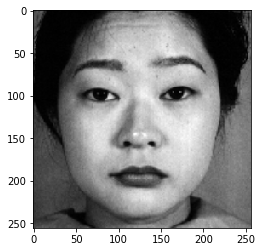

In [12]:
# Example of a picture
index = np.random.randint(0, m)
plt.imshow(X[index])
print ("y = " + str(Y.T[index]) + ". It's a(n) "  + decode_exp(Y.T[index]) + " picture.")

In [13]:
# Explore your dataset 
m_train = X_train.shape[0]
num_px = X_train.shape[1]
m_test = X_test.shape[0]

print ("Number of training examples: " + str(m_train))
print ("Number of testing examples: " + str(m_test))
print ("Each image is of size: (" + str(num_px) + ", " + str(num_px))
print ("train_x_orig shape: " + str(X_train.shape))
print ("train_y shape: " + str(Y_train.shape))
print ("test_x_orig shape: " + str(X_test.shape))
print ("test_y shape: " + str(Y_test.shape))

Number of training examples: 303
Number of testing examples: 150
Each image is of size: (65536, 65536
train_x_orig shape: (303, 65536)
train_y shape: (303, 7)
test_x_orig shape: (150, 65536)
test_y shape: (150, 7)


In [14]:
# Reshape the training and test examples 
X_train = X_train.T
X_test = X_test.T
Y_train = Y_train.T
Y_test = Y_test.T
print ("X_train's shape: " + str(X_train.shape))
print ("X_test's shape: " + str(X_test.shape))


X_train's shape: (65536, 303)
X_test's shape: (65536, 150)


In [15]:
### CONSTANTS DEFINING THE MODEL ####
n_x = 65536     # num_px * num_px
n_h = 21
n_y = 7
layers_dims = (n_x, n_h, n_y)

In [25]:
#  two_layer_model

def two_layer_model(X, Y, layers_dims, learning_rate = 0.05, num_iterations = 3000, print_cost=False):
    """
    Implements a two-layer neural network: LINEAR->RELU->LINEAR->SIGMOID.
    
    Arguments:
    X -- input data, of shape (n_x, number of examples)
    Y -- true "label" vector (containing 1 if cat, 0 if non-cat), of shape (1, number of examples)
    layers_dims -- dimensions of the layers (n_x, n_h, n_y)
    num_iterations -- number of iterations of the optimization loop
    learning_rate -- learning rate of the gradient descent update rule
    print_cost -- If set to True, this will print the cost every 100 iterations 
    
    Returns:
    parameters -- a dictionary containing W1, W2, b1, and b2
    """
    
    np.random.seed(1)
    grads = {}
    costs = []                              # to keep track of the cost
    m = X.shape[1]                           # number of examples
    (n_x, n_h, n_y) = layers_dims
    
    # Initialize parameters dictionary, by calling one of the functions you'd previously implemented
    ### START CODE HERE ### (≈ 1 line of code)
    parameters = initialize_parameters(n_x, n_h, n_y)
    ### END CODE HERE ###
    
    # Get W1, b1, W2 and b2 from the dictionary parameters.
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    
    # Loop (gradient descent)

    for i in range(0, num_iterations):

        # Forward propagation: LINEAR -> RELU -> LINEAR -> SIGMOID. Inputs: "X, W1, b1, W2, b2". Output: "A1, cache1, A2, cache2".
        ### START CODE HERE ### (≈ 2 lines of code)
        A1, cache1 = linear_activation_forward(X, W1, b1, "relu")
        A2, cache2 = linear_activation_forward(A1, W2, b2, "sigmoid")
        ### END CODE HERE ###
        
        # Compute cost
        ### START CODE HERE ### (≈ 1 line of code)
        cost = compute_cost(A2, Y)
        ### END CODE HERE ###
        
        # Initializing backward propagation
        dA2 = - (np.divide(Y, A2) - np.divide(1 - Y, 1 - A2))
        
        # Backward propagation. Inputs: "dA2, cache2, cache1". Outputs: "dA1, dW2, db2; also dA0 (not used), dW1, db1".
        ### START CODE HERE ### (≈ 2 lines of code)
        dA1, dW2, db2 = linear_activation_backward(dA2, cache2, "sigmoid")
        dA0, dW1, db1 = linear_activation_backward(dA1, cache1, "relu")
        ### END CODE HERE ###
        
        # Set grads['dWl'] to dW1, grads['db1'] to db1, grads['dW2'] to dW2, grads['db2'] to db2
        grads['dW1'] = dW1
        grads['db1'] = db1
        grads['dW2'] = dW2
        grads['db2'] = db2
        
        # Update parameters.
        ### START CODE HERE ### (approx. 1 line of code)
        parameters = update_parameters(parameters, grads, learning_rate)
        ### END CODE HERE ###

        # Retrieve W1, b1, W2, b2 from parameters
        W1 = parameters["W1"]
        b1 = parameters["b1"]
        W2 = parameters["W2"]
        b2 = parameters["b2"]
        
        # Print the cost every 100 training example
        if print_cost and i % 100 == 0:
            print("Cost after iteration {}: {}".format(i, np.squeeze(cost)))
        if print_cost and i % 100 == 0:
            costs.append(cost)
       
    # plot the cost

    plt.plot(np.squeeze(costs))
    plt.ylabel('cost')
    plt.xlabel('iterations (per hundreds)')
    plt.title("Learning rate =" + str(learning_rate))
    plt.show()
    
    return parameters

Run the cell below to train your parameters. See if your model runs. The cost should be decreasing. It may take up to 5 minutes to run 2500 iterations. Check if the "Cost after iteration 0" matches the expected output below, if not click on the square (⬛) on the upper bar of the notebook to stop the cell and try to find your error.

Cost after iteration 0: 4.875995680768246
Cost after iteration 100: 3.1738684657998206
Cost after iteration 200: 2.8784829867549435
Cost after iteration 300: 2.872454798583633
Cost after iteration 400: 2.8725929437389275
Cost after iteration 500: 2.864975492348518
Cost after iteration 600: 2.833916040926128
Cost after iteration 700: 2.832999988240951
Cost after iteration 800: 2.6731968839025138
Cost after iteration 900: 2.5981275789259666
Cost after iteration 1000: 2.6068779921337994
Cost after iteration 1100: 2.5342387259612225
Cost after iteration 1200: 2.5265967945223116
Cost after iteration 1300: 2.7875896271793525
Cost after iteration 1400: 2.590992085706562
Cost after iteration 1500: 2.756637138000294
Cost after iteration 1600: 2.739351555752944
Cost after iteration 1700: 2.454424567071349
Cost after iteration 1800: 2.9310907701659015
Cost after iteration 1900: 2.779588208873214
Cost after iteration 2000: 2.5262994669170427
Cost after iteration 2100: 2.501026967598572
Cost after 

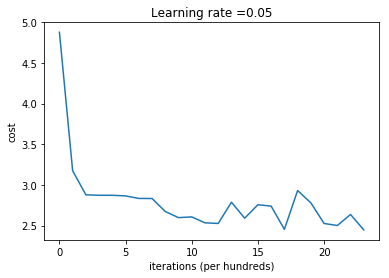

In [28]:
parameters = two_layer_model(X_train, Y_train, layers_dims = (n_x, n_h, n_y), num_iterations = 2400, print_cost=True)

**Expected Output**:
<table> 
    <tr>
        <td> **Cost after iteration 0**</td>
        <td> 0.6930497356599888 </td>
    </tr>
    <tr>
        <td> **Cost after iteration 100**</td>
        <td> 0.6464320953428849 </td>
    </tr>
    <tr>
        <td> **...**</td>
        <td> ... </td>
    </tr>
    <tr>
        <td> **Cost after iteration 2400**</td>
        <td> 0.048554785628770226 </td>
    </tr>
</table>

Good thing you built a vectorized implementation! Otherwise it might have taken 10 times longer to train this.

Now, you can use the trained parameters to classify images from the dataset. To see your predictions on the training and test sets, run the cell below.

In [56]:
predictions_train = predict(X_train, Y_train, parameters)

Accuracy: 0.40594059405940597


In [57]:
predictions_test = predict(X_test, Y_test, parameters)

Accuracy: 0.29333333333333333


In [67]:
### CONSTANTS ###
layers_dims = [65536 , 28, 21, 14, 7] #  4-layer model

In [71]:
#  FUNCTION: L_layer_model
def L_layer_model(X, Y, layers_dims, learning_rate = 0.0075, num_iterations = 3000, print_cost=False):#lr was 0.009
    """
    Implements a L-layer neural network: [LINEAR->RELU]*(L-1)->LINEAR->SIGMOID.
    
    Arguments:
    X -- data, numpy array of shape (num_px * num_px * 3, number of examples)
    Y -- true "label" vector (containing 0 if cat, 1 if non-cat), of shape (1, number of examples)
    layers_dims -- list containing the input size and each layer size, of length (number of layers + 1).
    learning_rate -- learning rate of the gradient descent update rule
    num_iterations -- number of iterations of the optimization loop
    print_cost -- if True, it prints the cost every 100 steps
    
    Returns:
    parameters -- parameters learnt by the model. They can then be used to predict.
    """

    np.random.seed(1)
    costs = []                         # keep track of cost
    
    # Parameters initialization. (≈ 1 line of code)
    ### START CODE HERE ###
    parameters = initialize_parameters_deep(layers_dims)
    ### END CODE HERE ###
    
    # Loop (gradient descent)
    for i in range(0, num_iterations):

        # Forward propagation: [LINEAR -> RELU]*(L-1) -> LINEAR -> SIGMOID.
        ### START CODE HERE ### (≈ 1 line of code)
        AL, caches = L_model_forward(X, parameters)
        ### END CODE HERE ###
        
        # Compute cost.
        ### START CODE HERE ### (≈ 1 line of code)
        cost = compute_cost(AL, Y)
        ### END CODE HERE ###
    
        # Backward propagation.
        ### START CODE HERE ### (≈ 1 line of code)
        grads = L_model_backward(AL, Y, caches)
        ### END CODE HERE ###
 
        # Update parameters.
        ### START CODE HERE ### (≈ 1 line of code)
        parameters = update_parameters(parameters, grads, learning_rate)
        ### END CODE HERE ###
                
        # Print the cost every 100 training example
        if print_cost and i % 100 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
        if print_cost and i % 100 == 0:
            costs.append(cost)
            
    # plot the cost
    plt.plot(np.squeeze(costs))
    plt.ylabel('cost')
    plt.xlabel('iterations (per hundreds)')
    plt.title("Learning rate =" + str(learning_rate))
    plt.show()
    
    return parameters

You will now train the model as a 4-layer neural network. 

Run the cell below to train your model. The cost should decrease on every iteration. It may take up to 5 minutes to run 2500 iterations. Check if the "Cost after iteration 0" matches the expected output below, if not click on the square (⬛) on the upper bar of the notebook to stop the cell and try to find your error.

Cost after iteration 0: 4.861358
Cost after iteration 100: 2.910636
Cost after iteration 200: 2.815051
Cost after iteration 300: 2.731079
Cost after iteration 400: 2.677853
Cost after iteration 500: 2.608153
Cost after iteration 600: 2.495593
Cost after iteration 700: 2.489661
Cost after iteration 800: 2.394400
Cost after iteration 900: 2.163300
Cost after iteration 1000: 2.395327
Cost after iteration 1100: 2.021839
Cost after iteration 1200: 1.915810
Cost after iteration 1300: 1.953375
Cost after iteration 1400: 1.840486
Cost after iteration 1500: 1.994984
Cost after iteration 1600: 1.946118
Cost after iteration 1700: 1.654807
Cost after iteration 1800: 2.253485
Cost after iteration 1900: 1.625593
Cost after iteration 2000: 1.459679
Cost after iteration 2100: 1.306641
Cost after iteration 2200: 1.876535
Cost after iteration 2300: 1.343405
Cost after iteration 2400: 1.268887


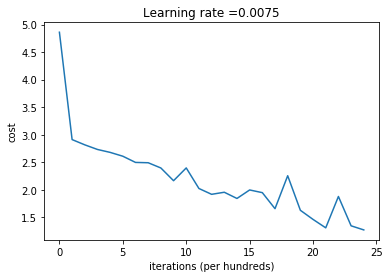

In [72]:
parameters = L_layer_model(X_train, Y_train, layers_dims, num_iterations = 2400, print_cost = True)

**Expected Output**:
<table> 
    <tr>
        <td> **Cost after iteration 0**</td>
        <td> 0.771749 </td>
    </tr>
    <tr>
        <td> **Cost after iteration 100**</td>
        <td> 0.672053 </td>
    </tr>
    <tr>
        <td> **...**</td>
        <td> ... </td>
    </tr>
    <tr>
        <td> **Cost after iteration 2400**</td>
        <td> 0.092878 </td>
    </tr>
</table>

In [73]:
pred_train = predict(X_train, Y_train, parameters)

Accuracy: 0.504950495049505


In [74]:
pred_test = predict(X_test, Y_test, parameters)

Accuracy: 0.4


In [111]:
def decode_predict(y):
    switch = {
        0: "Angry",
        1: "Disgust",
        2: "Fear",
        3: "Happy",
        4: "Sad",
        5: "Surprised",
        6: "Neutral"
    }
    return switch.get(y[0])

## Randomly checking the predictions

Accuracy: 1.0
Actual: Disgust face
Predicted: Disgust face


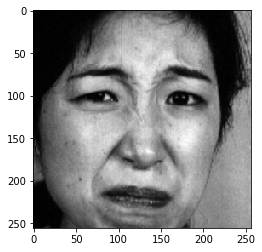

In [198]:
## START CODE HERE ##
index = np.random.randint(0, X_test.shape[1])
my_image = X_test.T[index].reshape(256*256,1)
my_label_y = Y_test.T[index].reshape((7,1)) # the true class of your image (1 -> cat, 0 -> non-cat)
## END CODE HERE ##

my_predicted_image = predict(my_image, my_label_y, parameters)
print("Actual: " + decode_exp(Y_test.T[index]) + ' face')
print("Predicted: " + decode_predict(my_predicted_image) + ' face')
plt.imshow(X_test.T[index].reshape(256,256))
#print ("y = " + str(np.squeeze(my_predicted_image)) + ", your L-layer model predicts a \"" + classes[int(np.squeeze(my_predicted_image)),].decode("utf-8") +  "\" picture.")

## It correctly predicts certain type of faces, but gets confused with similar expressions: sad, disgust, angry. 

## Below we can see how the expression lies on the boundary between sad/disgust

Accuracy: 0.0
Actual: Sad face
Predicted: Disgust face


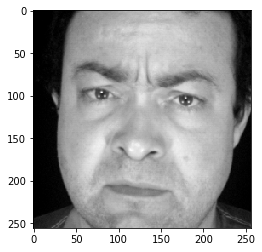

In [204]:
## START CODE HERE ##
index = np.random.randint(0, X_test.shape[1])
my_image = X_test.T[index].reshape(256*256,1)
my_label_y = Y_test.T[index].reshape((7,1)) # the true class of your image (1 -> cat, 0 -> non-cat)
## END CODE HERE ##

my_predicted_image = predict(my_image, my_label_y, parameters)
print("Actual: " + decode_exp(Y_test.T[index]) + ' face')
print("Predicted: " + decode_predict(my_predicted_image) + ' face')
plt.imshow(X_test.T[index].reshape(256,256))
#print ("y = " + str(np.squeeze(my_predicted_image)) + ", your L-layer model predicts a \"" + classes[int(np.squeeze(my_predicted_image)),].decode("utf-8") +  "\" picture.")